In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

####

Lecture du csv


####

In [2]:
df = pd.read_csv("./data/chansons.csv")
df.shape

(7574, 39)

###

39 colonnes... possible/probablement on aura de la colinéarité

Analysons un peu plus

###

In [3]:
df.isnull().sum()

annee                       0
titre                       0
artiste                     0
chansonID                   0
artisteID                   0
signature_temp              0
signature_temp_confiance    0
intensite                   0
tempo                       0
tempo_confiance             0
gamme                       0
gamme_confiance             0
energie                     0
hauteur                     0
timbre_0_min                0
timbre_0_max                0
timbre_1_min                0
timbre_1_max                0
timbre_2_min                0
timbre_2_max                0
timbre_3_min                0
timbre_3_max                0
timbre_4_min                0
timbre_4_max                0
timbre_5_min                0
timbre_5_max                0
timbre_6_min                0
timbre_6_max                0
timbre_7_min                0
timbre_7_max                0
timbre_8_min                0
timbre_8_max                0
timbre_9_min                0
timbre_9_m

###

Pas de nulls à régler

###

In [4]:
## un apperçu des variables
df.head()

,annee,titre,artiste,chansonID,artisteID,signature_temp,signature_temp_confiance,intensite,tempo,tempo_confiance,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [5]:
## Standard scaler. On a des variables dans le 10^0, 10^2. 
## Mieux vaut les mettre à la même échelle
def getScaledDf(pDfX, pScaler = StandardScaler()):
    return pScaler.fit_transform(pDfX)

###

Obtention des dfX (var indépend) et dfY (target, var dépend)


###

In [6]:
## retourne les dataframes X et Y. Par défaut, supprimer les colonnes ID
def getDfXDfY(pDf, pColY, pColsXDrop=['chansonID', 'artisteID']):
    dfY = pd.DataFrame(pDf[pColY], columns = [pColY])
    #print(type(pColsXDrop))
    #print(type(pColY))
    lstColsExcl=[]
    lstColsExcl.extend(pColsXDrop)
    lstColsExcl.append(pColY)
    print(lstColsExcl)
    dfX = pDf.drop(lstColsExcl, axis=1)
    return dfX, dfY

In [7]:
dfX, dfY = getDfXDfY(df, 'Top10')

['chansonID', 'artisteID', 'Top10']


In [8]:
dfX.dtypes

annee                         int64
titre                        object
artiste                      object
signature_temp                int64
signature_temp_confiance    float64
intensite                   float64
tempo                       float64
tempo_confiance             float64
gamme                         int64
gamme_confiance             float64
energie                     float64
hauteur                     float64
timbre_0_min                float64
timbre_0_max                float64
timbre_1_min                float64
timbre_1_max                float64
timbre_2_min                float64
timbre_2_max                float64
timbre_3_min                float64
timbre_3_max                float64
timbre_4_min                float64
timbre_4_max                float64
timbre_5_min                float64
timbre_5_max                float64
timbre_6_min                float64
timbre_6_max                float64
timbre_7_min                float64
timbre_7_max                

In [9]:
print(len(dfX['artiste'].unique()))
print(len(dfX['titre'].unique()))


1032
7141


####

Qu'est-ce qu'on fait avec les variables texte? On crée environ 8k colonnes avec get_dummies?
On les drop?

Pour l'instant, on va les ignorer (drop)

####

In [10]:
## obtention d'un df numérique

dfXNum = dfX.select_dtypes(exclude=['object'])

In [11]:
dfXNum.isnull().values.sum()

0

####

On prevoit les top 10.
Voyons qui sont les top 10 


#####

In [12]:
dfTop10 = df[(df['Top10']==1)]
len(dfTop10)


1119

####

On voit que 1119/7574 sont top 10 artists.
Examinons un petit plus

####

In [13]:
nbTop10Artistes = len(dfTop10['artiste'].unique())
nbArtistes = len(df['artiste'].unique())

nbRowsTop10 = len(dfTop10)
nbRowsTotal = len(df)

print ('nb top 10 artistes: ', nbTop10Artistes)
print ('nb artistes: ', nbArtistes)
print ('% artistes dans le top 10: ' , round((nbTop10Artistes/nbArtistes), 2))
print ('% de rows du dataframe qui sont dans le top 10: ', round((nbRowsTop10/nbRowsTotal), 2))
       


nb top 10 artistes:  576
nb artistes:  1032
% artistes dans le top 10:  0.56
% de rows du dataframe qui sont dans le top 10:  0.15


###

Un peu plus que la moitié d'artistes sont dans le Top 10 
Environ 15% des enregistrements correspondent au Top 10



###

In [14]:
## cela tue le kernel
#sns.pairplot(df)

In [149]:
### retourne les dataframes X et Y: train, validation et test (donc, 6 dataframes de retour). 
def get_train_val_test(pDfX, pDfY,  pTestSize=0.2):
    print("------get_train_val_test------")
    print("len(pDfY): ", len(pDfY))
    print("sum pDfY: ", pDfY.sum())
    ### test
    X_train_0, X_test, y_train_0, y_test = train_test_split(pDfX
                                                            , pDfY
                                                            , test_size=pTestSize
                                                            , shuffle=True
                                                            , random_state=0
                                                            , stratify=pDfY
                                                           )
    #print("len y_train_0: ", len(y_train_0))
    #print("sum y_train_0: ", y_train_0.sum())
    
    print("len y_test: ", len(y_test))
    print("sum y_test: ", y_test.sum())
    
    ## train, val
    X_train, X_val, y_train, y_val = train_test_split(X_train_0
                                                      , y_train_0
                                                      , train_size=0.5
                                                      , shuffle=True
                                                      , random_state=0
                                                      , stratify=y_train_0
                                                     )
    print("len y_train: ", len(y_train))
    print("len y_val: ", len(y_val))
    
    print("sum y_train: ", y_train.sum())
    print("sum y_val: ", y_val.sum())
    
    return X_train, X_val, X_test, y_train, y_val, y_test

####

Au long du cours on a vu plusieurs algorithmes de classification (knn, arbres de décision, forêts aléatoires) et aussi le choix de meilleurs paramètres avec une méthode exaustive (GridSearchCV) ou aléatoire (RandomizedSearchCV) 

Dans les lignes qui suivent, on va appliquer la recherche aléatoire pour obtention des hyperparamètres en combinaison avec les algorithmes de classification


Comme dans le TP01, on va créer une série des focntions que l'on appelera par la suite pour faciliter la réutilisation du code par les différentes algorithmes de classification

####

In [150]:

from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.utils.fixes import loguniform
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [151]:
def plot_roc_curve(pYVal, pYValProba, pLabel):
    
    #fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_label)
    fpr, tpr, thresholds = roc_curve(pYVal, pYValProba)
    fig = plt.figure(4, figsize=(6,6))
    plt.plot([0,1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=pLabel)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    #plot_roc_curve(fpr, tpr)
    plt.show()

In [152]:
def plot_multi_roc_curve(pDictResults):
    print ("--[plot_multi_roc_curve]--")
    
    fig = plt.figure(4, figsize=(7,7))
       
    
    for key in pDictResults.keys():
        print("[key]: ", key)
        innerDict = pDictResults.get(key)
        y_actual = innerDict.get('y_actual')
        y_pred = innerDict.get('y_pred')
        roc_auc = innerDict.get('roc_auc_score')

        fpr, tpr, thresholds = roc_curve(y_actual, y_pred)
        

        plt.plot(fpr, tpr,label = key + " - [roc_auc]: "+str(round(roc_auc, 3)))
        #plot_roc_curve(fpr, tpr, label=key)


    plt.plot([0,1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    
    plt.show()   

In [153]:
## plot one precision recall
def plot_precision_recall(pYActual, pYPred, pLabel):
    precision, recall, thresholds = precision_recall_curve(pYActual, pYPred)
    score = average_precision_score(pYActual, pYPred, average='weighted')
    fig = plt.figure(4, figsize=(6,6))
    #plt.plot([0,1], [0, 1], 'k--')
    plt.plot(precision, recall, label=pLabel)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='lower left')
    #plot_roc_curve(fpr, tpr)
    plt.show()
    

In [154]:
## precision recall curve
'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score
AP summarizes a precision-recall curve as the weighted mean of 
precisions achieved at each threshold
, with the increase in recall from the previous threshold used as 
the weight:
'''
## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
def plot_multi_precision_recall(pDictResults):
    print ("--[plot_multi_precision_recall--")
    
    fig = plt.figure(4, figsize=(7,7))
       
    
    for key in pDictResults.keys():
        print("----------------------------")
        print("[key]: ", key)
        
        innerDict = pDictResults.get(key)
        y_actual = innerDict.get('y_actual')
        y_pred = innerDict.get('y_pred')
        
        
        #print(classification_report(y_actual, y_pred))
        
        #roc_auc = innerDict.get('roc_auc_score')

        precision, recall, thresholds = precision_recall_curve(y_actual, y_pred)
        #auc_precision_recall = auc(recall, precision)
        score = average_precision_score(y_actual, y_pred, average='weighted')
        
        print("-----[begin debug]------")
        print("actual: ", y_actual)
        print("pred: ", y_pred)
        print("-----[end debug]------")
        
        
        avg_precision_auc = auc(recall, precision)
        

        #plt.plot(recall, precision,label = key + " - [auc]: "+str(round(auc_precision_recall, 3)))
        plt.plot(recall, precision,label = key + " - [avg_precision_auc]: "+str(round(avg_precision_auc, 3)))
        #plt.plot(recall, precision,label = key + " - [f1_precision]: "+str(round(score, 3)))
        #plot_roc_curve(fpr, tpr, label=key)


    #plt.plot([1,1], [1, 0], 'k--')
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    #pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='lower left')
    
    plt.show() 


    

In [155]:
### dictionnaire avec les modèles à analyser
## 1) créer modèles
## 2) créer paramètres
## 3) ajouter au dicitonnaire

def getDictModels():
    ## baseline - dummy
    dummy_c = DummyClassifier()

    ## logistc regression
    log_r = LogisticRegression(solver='saga'
    , max_iter= 10^200
    #, penalty='elasticnet'
    , random_state=2023)

    ## knn
    model_knn = KNeighborsClassifier()

    ## decision tree
    model_decision_tree = DecisionTreeClassifier()

    ## extra tree
    model_extra_tree = ExtraTreesClassifier()

    ## random forest
    model_random_forest = RandomForestClassifier()


    ##bagging
    model_bagging = BaggingClassifier()

    ## gradient boosting
    model_gradient_boosting  = GradientBoostingClassifier()

    ##
    params_dummy = {'strategy' : ['most_frequent', 'prior']}

    ##
    params_log = {
      #'C' :[0, 0.01, 0.07, 0.1, 0.2 ,0.5, 0.7 , 1, 10, 100]
      'C' :loguniform(1e-5, 1e3)
    , 'l1_ratio': [0, 0.05, 0.1, 0.5, 1]
    #, 'penalty': ['l1', 'l2', 'elasticnet', 'none']
    #, 'penalty': ['l1', 'l2', 'elasticnet']
    , 'penalty': ['elasticnet']
    }

    ## knn
    params_knn = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
    , 'metric': ['minkowski', 'euclidean', 'manhattan']
    , 'weights' : ['uniform', 'distance']
      }

    ## decision tree
    params_decision_tree = { 
      'criterion': ['gini', 'entropy']
      , 'ccp_alpha': loguniform(1e-3, 1e3)
      , 'max_depth': randint(2, 128)
    }

    ## extra_tree
    params_extra_tree = { 
      'criterion' : ['gini', 'entropy', 'log_loss']  
      , 'n_estimators': randint(1, 10^3)
      , 'min_samples_split' : randint(2, 10^5)
      , 'min_samples_leaf' : randint(1, 10^5)
      , 'max_features': ['sqrt', 'log2']
    }



    ## random forest
    params_random_forest = {
      'criterion' : ['gini', 'entropy', 'log_loss']  
      , 'n_estimators': randint(1, 10^3)
      , 'min_samples_split' : randint(2, 10^5)
      , 'min_samples_leaf' : randint(1, 10^5)
      , 'max_features': ['sqrt', 'log2']
    }

    ## bagging
    params_bagging = {
      'n_estimators': randint(1, 10^3)
    }

    ## params gradient boosting
    params_gradient_boosting = {
        'n_estimators' : randint(1, 10^3)
        , 'learning_rate' : loguniform(-8, 1)
        #, 'max_depth':  randint(1, 10^2)
        #, 'loss' : ['log_loss', 'deviance']
        #, 'max_features':  ['sqrt', 'log2']
        #, 'ccp_alpha' : loguniform(-6, 2)
    }


    ## dictionary containing models
    dictModels = {}


    #dictModels.update({'dummy':{'model': dummy_c, 'params': params_dummy}})
    dictModels.update({'log':{'model':log_r, 'params':params_log}})
    dictModels.update({'knn': {'model':model_knn, 'params': params_knn}})
    dictModels.update({'decisionTree': {'model': model_decision_tree, 'params': params_decision_tree}})
    #dictModels.update({'extraTree': {'model': model_extra_tree, 'params': params_extra_tree}})
    dictModels.update({'randomForest': {'model': model_random_forest, 'params': params_random_forest}})
    dictModels.update({'baggingClassifier': {'model': model_bagging, 'params': params_bagging}})
    #dictModels.update({'gradientBoosting': {'model': model_gradient_boosting, 'params': params_gradient_boosting}})
    
    return dictModels

In [156]:
def doClassificationAnalysis(pDfX, pScoring='recall'):
    ## Obtention des df train, val, test
    scaler = StandardScaler()
    X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
        scaler.fit_transform(pDfX)
        , dfY)

    ## récupérer dictionnaire de modèles à analyser
    dictModels = getDictModels()
    
    ## colonnes du dictionnaire interne
    lstKeysInnerDict=['model', 'params']

    ## dicionnaire de résultats
    dictResults = {}


    lstCols = ['train', 'pred']
    dfResultTrainPred = pd.DataFrame(columns = lstCols )

    ### scoring
    #scoringMethod='roc_auc'
    scoringMethod=pScoring
    #scoringMethod=[ 'roc_auc', 'recall'] 

    ## parcourir le dictionnaire de modèles et appliquer randomizedSearch
    ## pour trouver les meilleurs paramètres

    for key in dictModels.keys():
        #print("key: ", key)
        #print("value: ", dictModels.get(key))
        innerDict = dictModels.get(key)
        print ('-------------')
        model = innerDict.get('model')
        params = innerDict.get('params')
        print('[model]: ', model)
        print('[params]: ', params)

        #### randomized search
        #hyper_p_search = RandomizedSearchCV(model, params, cv=5, scoring=scoringMethod, n_iter = 5*10^2, random_state=2023)
        hyper_p_search = RandomizedSearchCV(model, params
                                        , cv=5
                                        , scoring=scoringMethod
                                        , n_iter = 1*10^2
                                        , random_state=2023)
        print(hyper_p_search.fit(X_train, y_train.values.ravel()))
        print("Best params: ", hyper_p_search.best_params_)
        print("Best score: ["+scoringMethod+"]:",  hyper_p_search.best_score_)
    
        y_train_pred = hyper_p_search.best_estimator_.predict_proba(X_train)[:, 1]
        y_val_pred = hyper_p_search.best_estimator_.predict_proba(X_val)[:, 1]
    
        #print("AUC : ", auc(y_val, y_val_pred))
    
    
        #curr_roc_auc_score = roc_auc_score(y_train, y_train_pred)
        curr_roc_auc_score_val = roc_auc_score(y_val, y_val_pred)
    
        # precision recall
        curr_precision_score = average_precision_score(y_val, y_val_pred)

        #print(f'AUC train = {curr_roc_auc_score}')
        #print(f'AUC val = {curr_roc_auc_score_val}')
    

        #print('type(train): ', type(y_train))
        #print('type(train_pred): ', type(y_train_pred))

        #print("train.head(): ", y_train.head())
        #print("train.to_numpy(): ", y_train.to_numpy())

        #dictResults.update({key: {'y_actual': y_train, 'y_pred':y_train_pred, 'roc_auc_score':curr_roc_auc_score }})
        dictResults.update({key: {'y_actual': y_val, 'y_pred':y_val_pred, 'roc_auc_score':curr_roc_auc_score_val }})
        print("len(dictResults): ", len(dictResults))
        #results[type(model)] = y_train_pred

        #plot_roc_curve(y_train, y_train_pred, pLabel = type(model))
        #plot_precision_recall(y_train, y_train_pred, pLabel = type(model))
    
        if(pScoring=='roc_auc'):
            plot_roc_curve(y_val, y_val_pred, pLabel = curr_roc_auc_score_val)
        else:
            plot_precision_recall(y_val, y_val_pred, pLabel = curr_roc_auc_score_val)

    

    if(pScoring=='roc_auc'):
        plot_multi_roc_curve(dictResults)
    else:
        plot_multi_precision_recall(dictResults)


In [138]:
#doClassificationAnalysis(dfXNum, pScoring='roc_auc')

-------------
[model]:  LogisticRegression(max_iter=194, random_state=2023, solver='saga')
[params]:  {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f866fc22560>, 'l1_ratio': [0, 0.05, 0.1, 0.5, 1], 'penalty': ['elasticnet']}
RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=194, random_state=2023,
                                                solver='saga'),
                   n_iter=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f866fc22560>,
                                        'l1_ratio': [0, 0.05, 0.1, 0.5, 1],
                                        'penalty': ['elasticnet']},
                   random_state=2023, scoring='recall')
Best params:  {'C': 2.3697671765772466, 'l1_ratio': 1, 'penalty': 'elasticnet'}
Best score: [recall]: 0.22139825218476905
len(dictResults):  1


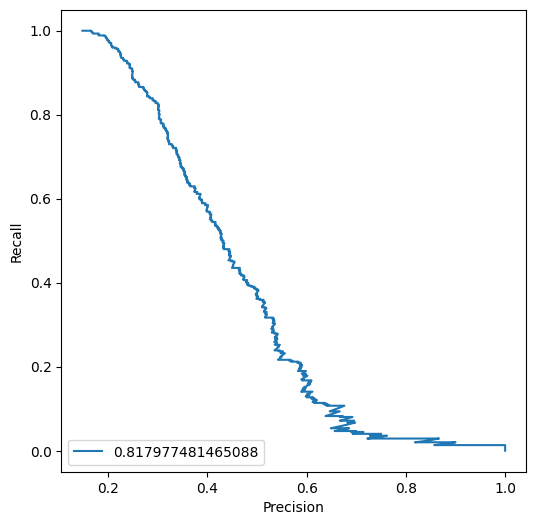

-------------
[model]:  KNeighborsClassifier()
[params]:  {'n_neighbors': [2, 3, 5, 10, 20], 'leaf_size': [10, 20, 30], 'p': [1, 2, 3], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=8,
                   param_distributions={'leaf_size': [10, 20, 30],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [2, 3, 5, 10, 20],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=2023, scoring='recall')
Best params:  {'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 20}
Best score: [recall]: 0.26861423220973785
len(dictResults):  2


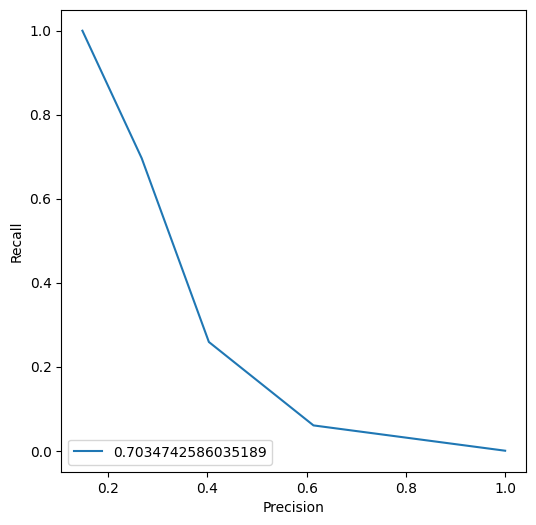

-------------
[model]:  DecisionTreeClassifier()
[params]:  {'criterion': ['gini', 'entropy'], 'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f866ef46140>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866fea43a0>}
RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=8,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f866ef46140>,
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866fea43a0>},
                   random_state=2023, scoring='recall')
Best params:  {'ccp_alpha': 0.001356869154129798, 'criterion': 'entropy', 'max_depth': 55}
Best score: [recall]: 0.28182272159800253
len(dictResults):  3


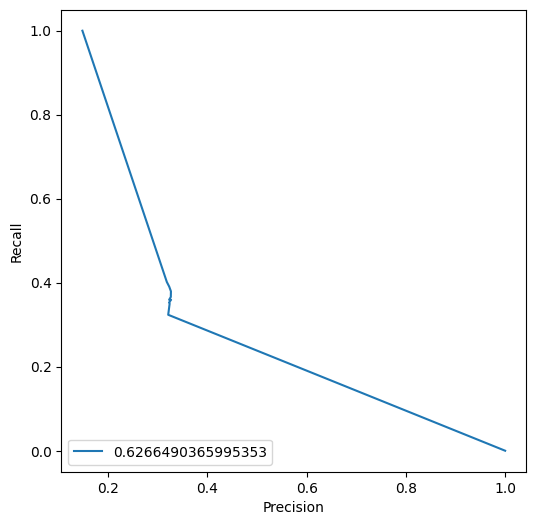

-------------
[model]:  RandomForestClassifier()
[params]:  {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866fea6740>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866f7cda80>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866f1d43a0>, 'max_features': ['sqrt', 'log2']}
RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=8,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866f1d43a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866f

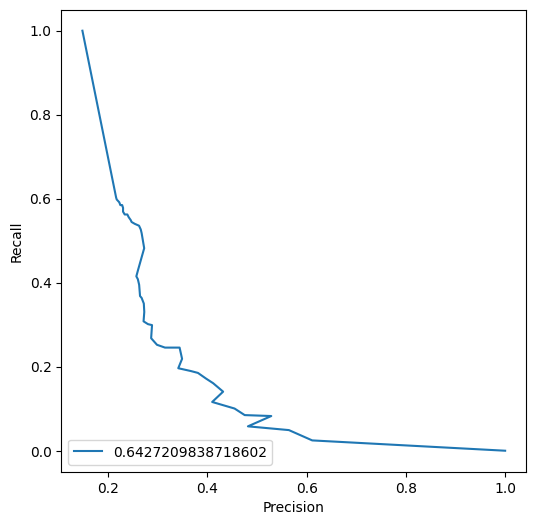

-------------
[model]:  BaggingClassifier()
[params]:  {'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866ef88040>}
RandomizedSearchCV(cv=5, estimator=BaggingClassifier(), n_iter=8,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f866ef88040>},
                   random_state=2023, scoring='recall')
Best params:  {'n_estimators': 5}
Best score: [recall]: 0.24606741573033708
len(dictResults):  5


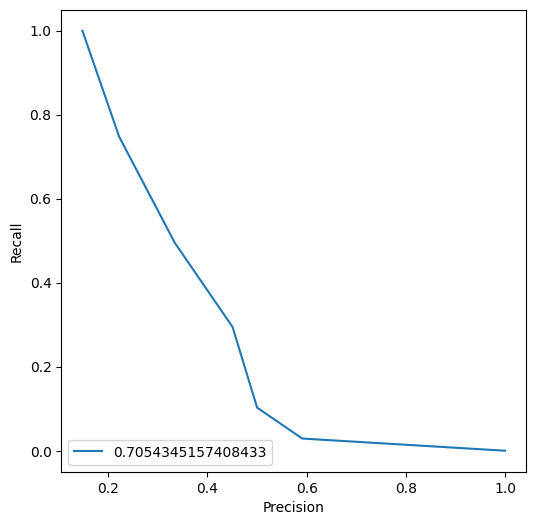

--[plot_multi_precision_recall--
----------------------------
[key]:  log
-----[begin debug]------
actual:        Top10
5460      0
687       0
3237      0
3453      0
5387      0
...     ...
2619      0
1376      0
379       0
5268      0
2558      0

[3030 rows x 1 columns]
pred:  [0.13207328 0.03088958 0.27688126 ... 0.0461817  0.00920343 0.07322911]
-----[end debug]------
----------------------------
[key]:  knn
-----[begin debug]------
actual:        Top10
5460      0
687       0
3237      0
3453      0
5387      0
...     ...
2619      0
1376      0
379       0
5268      0
2558      0

[3030 rows x 1 columns]
pred:  [0.33333333 0.33333333 0.33333333 ... 0.         0.33333333 0.        ]
-----[end debug]------
----------------------------
[key]:  decisionTree
-----[begin debug]------
actual:        Top10
5460      0
687       0
3237      0
3453      0
5387      0
...     ...
2619      0
1376      0
379       0
5268      0
2558      0

[3030 rows x 1 columns]
pred:  [0.8 0.  0.  ..

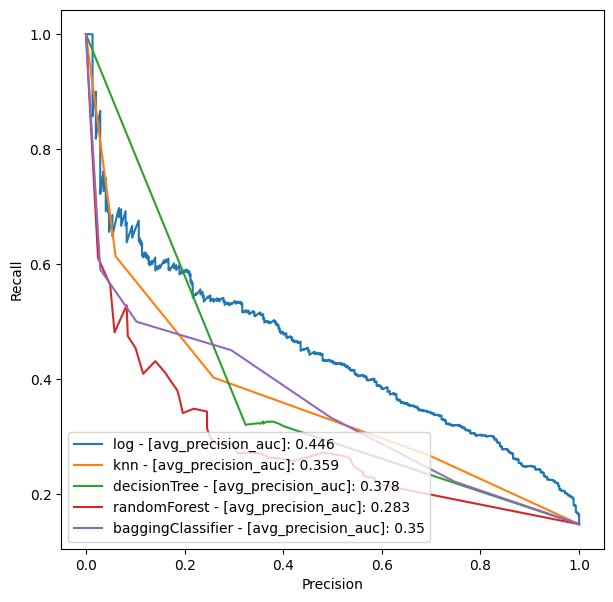

In [125]:
## recall
'''
The recall is the ratio tp / (tp + fn) where tp is the number of true positives 
and fn the number of false negatives. The recall is intuitively the ability of the classifier 
to find all the positive samples.
'''
doClassificationAnalysis(dfXNum, pScoring='recall')

In [ ]:
#doClassificationAnalysis(dfXNum, pScoring='precision')

####

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

F1-score: the higher, the better. Max=1

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

####

------get_train_val_test------
len(pDfY):  7574
sum pDfY:  Top10    1119
dtype: int64
len y_test:  1515
sum y_test:  Top10    224
dtype: int64
len y_train:  3029
len y_val:  3030
sum y_train:  Top10    447
dtype: int64
sum y_val:  Top10    448
dtype: int64
Dummy: f1=0.000 auc=0.574


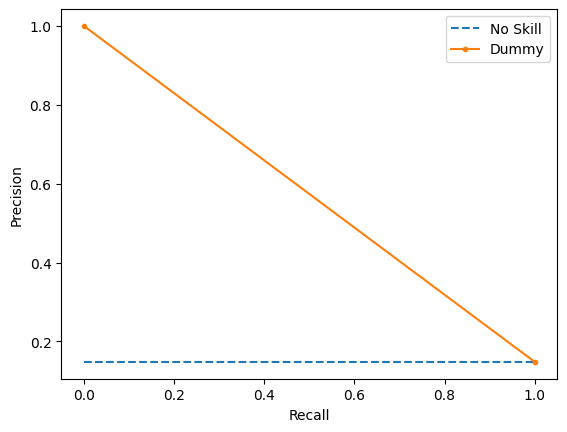

In [165]:
### dummy

## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

##################
## Obtention des df train, val, test
scaler = StandardScaler()
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)

trainX = X_train
testX = X_val
trainy = y_train
testy = y_val
##############

# fit a model
model = DummyClassifier(strategy= 'most_frequent')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Dummy: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
#no_skill = len(testy[testy==1]) / len(testy)
no_skill = testy.sum()/ len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Dummy')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

------get_train_val_test------
len(pDfY):  7574
sum pDfY:  Top10    1119
dtype: int64
len y_test:  1515
sum y_test:  Top10    224
dtype: int64
len y_train:  3029
len y_val:  3030
sum y_train:  Top10    447
dtype: int64
sum y_val:  Top10    448
dtype: int64
Logistic: f1=0.831 auc=0.446


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


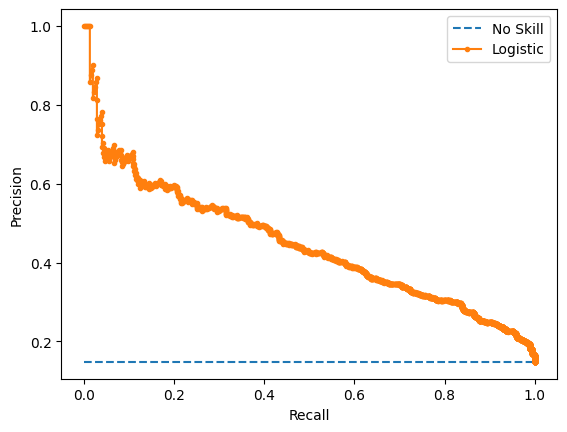

In [168]:
### logistic

## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

##################
## Obtention des df train, val, test
scaler = StandardScaler()
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)

trainX = X_train
testX = X_val
trainy = y_train
testy = y_val
##############

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1 = f1_score(testy, yhat, average='weighted')
lr_auc = auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
#no_skill = len(testy[testy==1]) / len(testy)
no_skill = testy.sum()/ len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [129]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)

print ("len(dfY)", len(y_train))
print ("len(y_train)", len(y_train))
print ("len(y_val)", len(y_val))
print ("len(y_test)", len(y_val))

print ("y_train.sum()", y_train.sum())
print ("y_val.sum()", y_val.sum())
print ("y_test.sum()", y_test.sum())

len(dfY) 3029
len(y_train) 3029
len(y_val) 3030
len(y_test) 3030
y_train.sum() Top10    447
dtype: int64
y_val.sum() Top10    448
dtype: int64
y_test.sum() Top10    224
dtype: int64


------get_train_val_test------
len(pDfY):  7574
sum pDfY:  Top10    1119
dtype: int64
len y_test:  1515
sum y_test:  Top10    224
dtype: int64
len y_train:  3029
len y_val:  3030
sum y_train:  Top10    447
dtype: int64
sum y_val:  Top10    448
dtype: int64
Random Forest: f1=0.804 auc=0.433
[A] - len(testy[testy==1]):  Top10    448
dtype: int64
[B] - lent(testy) :  3030
no_skill (A/B):  Top10    0.147855
dtype: float64


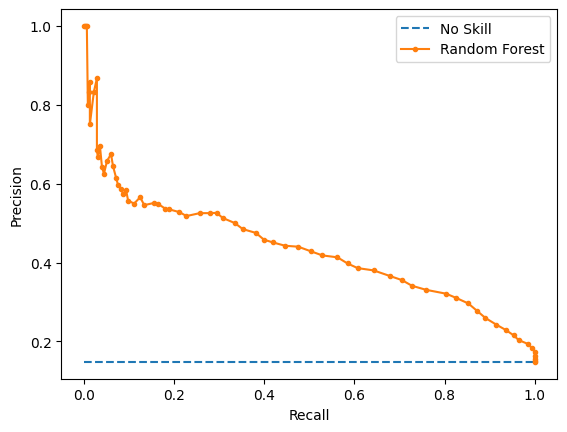

In [173]:
## random forest
## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

##################
## Obtention des df train, val, test
scaler = StandardScaler()
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)

trainX = X_train
testX = X_val
trainy = y_train
testy = y_val
##############

# fit a model
model = RandomForestClassifier(random_state=2023, class_weight='balanced')
model.fit(trainX, trainy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)

## 'weighted':
##Calculate metrics for each label, and find their average weighted 
##by support (the number of true instances for each label).
lr_f1= f1_score(testy, yhat, average='weighted')
lr_auc = auc(lr_recall, lr_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
#no_skill = len(testy[testy==1]) / len(testy)
no_skill = testy.sum() / len(testy)

print("[A] - len(testy[testy==1]): ", testy.sum())
print("[B] - lent(testy) : ", len(testy))
print("no_skill (A/B): ", no_skill) 


pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:

## Obtention des df train, val, test
scaler = StandardScaler()
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
    scaler.fit_transform(dfXNum)
    , dfY)
    
## baseline - dummy
dummy_c = DummyClassifier()

## logistc regression
log_r = LogisticRegression(solver='saga'
, max_iter= 10^200
#, penalty='elasticnet'
, random_state=2023)

## knn
model_knn = KNeighborsClassifier()

## decision tree
model_decision_tree = DecisionTreeClassifier()

## extra tree
model_extra_tree = ExtraTreesClassifier()

## random forest
model_random_forest = RandomForestClassifier()


##bagging
model_bagging = BaggingClassifier()

## gradient boosting
model_gradient_boosting  = GradientBoostingClassifier()

##
params_dummy = {'strategy' : ['most_frequent', 'prior']}

##
params_log = {
  #'C' :[0, 0.01, 0.07, 0.1, 0.2 ,0.5, 0.7 , 1, 10, 100]
  'C' :loguniform(1e-5, 1e3)
, 'l1_ratio': [0, 0.05, 0.1, 0.5, 1]
#, 'penalty': ['l1', 'l2', 'elasticnet', 'none']
#, 'penalty': ['l1', 'l2', 'elasticnet']
, 'penalty': ['elasticnet']
}

## knn
params_knn = {'n_neighbors': [2,3,5,10,20], 'leaf_size':[10, 20, 30], 'p':[1,2,3]
, 'metric': ['minkowski', 'euclidean', 'manhattan']
, 'weights' : ['uniform', 'distance']
  }

## decision tree
params_decision_tree = { 
  'criterion': ['gini', 'entropy']
  , 'ccp_alpha': loguniform(1e-3, 1e3)
  , 'max_depth': randint(2, 128)

}

## extra_tree
params_extra_tree = { 
  'criterion' : ['gini', 'entropy', 'log_loss']  
  , 'n_estimators': randint(1, 10^3)
  , 'min_samples_split' : randint(2, 10^5)
  , 'min_samples_leaf' : randint(1, 10^5)
  , 'max_features': ['sqrt', 'log2']

}



## random forest
params_random_forest = {
  'criterion' : ['gini', 'entropy', 'log_loss']  
  , 'n_estimators': randint(1, 10^3)
  , 'min_samples_split' : randint(2, 10^5)
  , 'min_samples_leaf' : randint(1, 10^5)
  , 'max_features': ['sqrt', 'log2']

}

## bagging
params_bagging = {
  'n_estimators': randint(1, 10^3)
}

## params gradient boosting
params_gradient_boosting = {
    
    'n_estimators' : randint(1, 10^3)
    , 'learning_rate' : loguniform(-8, 1)
    #, 'max_depth':  randint(1, 10^2)
    #, 'loss' : ['log_loss', 'deviance']
    #, 'max_features':  ['sqrt', 'log2']
    #, 'ccp_alpha' : loguniform(-6, 2)
    
}


## dictionary containing models
dictModels = {}


dictModels.update({'dummy':{'model': dummy_c, 'params': params_dummy}})
#dictModels.update({'log':{'model':log_r, 'params':params_log}})
#dictModels.update({'knn': {'model':model_knn, 'params': params_knn}})
#dictModels.update({'decisionTree': {'model': model_decision_tree, 'params': params_decision_tree}})
#dictModels.update({'extraTree': {'model': model_extra_tree, 'params': params_extra_tree}})
#dictModels.update({'randomForest': {'model': model_random_forest, 'params': params_random_forest}})
dictModels.update({'baggingClassifier': {'model': model_bagging, 'params': params_bagging}})
#dictModels.update({'gradientBoosting': {'model': model_gradient_boosting, 'params': params_gradient_boosting}})

lstKeysInnerDict=['model', 'params']

dictResults = {}

results = {}
lstCols = ['train', 'pred']
dfResultTrainPred = pd.DataFrame(columns = lstCols )

### scoring
#scoringMethod='roc_auc'
scoringMethod='recall'

for key in dictModels.keys():
    #print("key: ", key)
    #print("value: ", dictModels.get(key))
    innerDict = dictModels.get(key)
    print ('-------------')
    model = innerDict.get('model')
    params = innerDict.get('params')
    print('[model]: ', model)
    print('[params]: ', params)

    #### randomized search
    #hyper_p_search = RandomizedSearchCV(model, params, cv=5, scoring=scoringMethod, n_iter = 5*10^2, random_state=2023)
    hyper_p_search = RandomizedSearchCV(model, params
                                        , cv=5
                                        , scoring=scoringMethod
                                        , n_iter = 1*10^2
                                        , random_state=2023)
    print(hyper_p_search.fit(X_train, y_train.values.ravel()))
    print("Best params: ", hyper_p_search.best_params_)
    print("Best score: ["+scoringMethod+"]:",  hyper_p_search.best_score_)
    
    y_train_pred = hyper_p_search.best_estimator_.predict_proba(X_train)[:, 1]
    curr_roc_auc_score = roc_auc_score(y_train, y_train_pred)
    

    print(f'AUC = {curr_roc_auc_score}')
    

    #print('type(train): ', type(y_train))
    #print('type(train_pred): ', type(y_train_pred))

    #print("train.head(): ", y_train.head())
    #print("train.to_numpy(): ", y_train.to_numpy())

    dictResults.update({key: {'y_actual': y_train, 'y_pred':y_train_pred, 'roc_auc_score':curr_roc_auc_score }})
    print("len(dictResults): ", len(dictResults))
    #results[type(model)] = y_train_pred

    plot_roc_curve(y_train, y_train_pred, pLabel = type(model))
    

    

plot_multi_roc_curve(dictResults)
plot_multi_precision_recall(dictResults)


In [ ]:
## gradient boosting
model_gradient_boosting  = GradientBoostingClassifier(
n_estimators =  10
    #, learning_rate = loguniform(-8, 1)
    , max_depth =  10
    #, 'loss' : ['log_loss', 'deviance']
    #, 'max_features':  ['sqrt', 'log2']
    #, 'ccp_alpha' : loguniform(-6, 2)
)
model_gradient_boosting.fit(getScaledDf(X_train), y_train.values.ravel())
y_train_pred = model_gradient_boosting.predict_proba(X_train)
print (y_train_pred)
#curr_roc_auc_score = roc_auc_score(y_train, y_train_pred)
#print(curr_roc_auc_score)

avg_precision = average_precision_score(y_train, y_train_pred)
print(avg_precision)

In [ ]:
print(dir(randint(1, 10^2)))

###

Baseline - dummy classifier

###

In [ ]:
## baseline - dummy
dummy_c = DummyClassifier()
##
params_dummy = {'strategy' : ['most_frequent', 'prior']}
dictModels.update({'dummy':{'model': dummy_c, 'params': params_dummy}})

In [ ]:
scoringMethod = 'sensitivity'
hyper_p_search = RandomizedSearchCV(model, params, cv=5, scoring=scoringMethod, n_iter = 5*10^2, random_state=2023)
print(hyper_p_search.fit(X_train, y_train))
print("Best params: ", hyper_p_search.best_params_)
print("Best score: ["+scoringMethod+"]:",  hyper_p_search.best_score_)
    

In [ ]:
### Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
## plot la matrice confusion
def print_confusion_matrix(pDfYTest, pDfYPredictTest):
    matrix = confusion_matrix(y_true=pDfYTest, y_pred=pDfYPredictTest)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

In [ ]:


## precision recall curve
def print_precision_recall(pYTest, pYTestPred):
    precision, recall, thresholds = precision_recall_curve(pYTest, pYTestPred)
    fig = plt.figure(7, figsize=(6,6))
    plt.plot(recall, precision, color='b')
    plt.xlabel('Recall')
    plt.xlabel('Precision')
    plt.title('Precision-Recall curve')

In [ ]:
## imprime les metrics
def print_metrics(pDfYVal, pDfYValPredLabel):
    print("[score]: ", accuracy_score(pDfYVal, pDfYValPredLabel))
    fpr, tpr, thresholds = metrics.roc_curve(pDfYVal, pDfYValPredLabel)
    
    ## sensitivity: the % of all 1s that are correctly classified as 1
    ## recall = sensitivty 
    print("[sensitiviy (recall)]: ", metrics.recall_score(pDfYVal, pDfYValPredLabel))
    
    #y_true = pDfYVal
    #y_pred = pDfYValPredLabel
    
    ## sensitivity: the % of all 1s that are correctly classified as 1
    #print ("tpr: ", tpr)
    #print ("fpr: ", fpr)
    #sensitivity = tpr/(tpr+fpr)
    #print("[sensitivity]: ", sensitivity)
    #print("---report---")
    #print(classification_report(y_true, y_pred))
    

In [ ]:
# affiche l'arbre
def print_tree(pModel, pCols):
    tree.plot_tree(pModel , filled=True, rounded=True, feature_names = pCols)

In [ ]:
## roc courbe
def print_roc_auc(pDfYTest, pDfYPredictTest):
    fpr, tpr, thresholds = metrics.roc_curve(pDfYTest, pDfYPredictTest)
    roc_auc = metrics.auc(fpr, tpr)
    roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,)
    roc_display.plot()

In [ ]:
### dummy
def analyze_dummy(pDfX, pDfY, pTestSize=0.2, pThreshold=0.5):
    model = DummyClassifier(strategy="most_frequent")
    analyze_model(pDfX, pDfY, model, pTestSize=0.2, pThreshold=0.5)
    
   

In [ ]:
### analyse d'un modèle pModel
def analyze_model(pDfX, pDfY, pModel, pTestSize=0.2, pThreshold=0.5, pScaler = StandardScaler() ):
    
    
    ### test
    #X_train_0, X_test, y_train_0, y_test = train_test_split(pDfX
    #                                                        , pDfY
    #                                                        , test_size=pTestSize
    #                                                        , shuffle=True
    #                                                        , random_state=0
    #                                                        , stratify=pDfY
    #                                                       )
    ## train, val
    #X_train, X_val, y_train, y_val = train_test_split(X_train_0
    #                                                  , y_train_0
    #                                                  , train_size=0.5
    #                                                  , shuffle=True
    #                                                  , random_state=0
    #                                                  , stratify=y_train_0
    #                                                 )
    
    ## Obtention des df train, val, test
    X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(pScaler.fit_transform(pDfX), pDfY)
    
    pModel.fit(X_train, y_train)
    y_val_pred_proba = pModel.predict_proba(X_val)[:, 1]
    
    
    print("[y_val_pred_proba]: ", y_val_pred_proba)
    
    ## 0 ou 1
    y_val_pred_label = y_val_pred_proba > pThreshold ## rigidification
    
    
    ## on on print score seulement si c'est dummy
    ## sinon: ValueError: Classification metrics can't handle a mix of binary and continuous targets
    isinstanceDummy = isinstance(pModel, DummyClassifier)
    
          
            
    #if(isinstanceDummy):
    #print_metrics(y_val, y_val_pred_proba)
    #print_metrics(y_val, y_val_pred_label)
    
    #print("model.score: ", pModel.score(X_val, y_val))
    
    #print_confusion_matrix(y_val, y_val_pred_proba)
    #print_confusion_matrix(y_val, y_val_pred_label)
    
    print_roc_auc(y_val, y_val_pred_proba)
    #print_roc_auc(y_val, y_val_pred_label)
    
    
    ## dummy n'a pas decision function
    #if(hasattr(pModel, 'decision_function')):
    print_precision_recall(y_val, y_val_pred_proba)
    #print_precision_recall(y_val, y_val_pred_label)

In [ ]:
analyze_dummy(dfXNum, dfY)

####

Le résultat est cohérent. Le dummy sort toujours la valeur la plus fréquente (0 dans environ 100-15=85% de cas)

Pourtant, ce 85% de précision ne veut pas dire grandes choses. On est dans un 'Rare Class Problem' où le 1
(top 10) est beaucoup moins représenté que le 0. (Pour ma propre référence: livre Practical Statistics for Data Scientist, pg 223).

Dans le cas du top 10, je prends la sensibilité, 'la capacité du modèle de predire un positif', comme une métrique plus importante que la précision. Et dans ce cas, notre sensibilité =0 (aucune prediction positive), ce qui est normal pour le dummy classifier vu que le 0 est la classe la plus fréquente.

Concernant la courbe roc, le dummy coïncide avec la diagonale, c'est qui est vraiment le baseline.

Pour les autres modèles, on attend une courbe au dessus de la ligne bleue

####

####

Au long du cours on a vu plusieurs algorithmes de classification (knn, arbres de décision, forêts aléatoires) et aussi le choix de meilleurs paramètres avec une méthode exaustive (GridSearchCV) ou aléatoire (RandomizedSearchCV) 

Dans les lignes qui suivent, on va appliquer la recherche aléatoire pour obtention des hyperparamètres en combinaison avec les algorithmes de classification

####

In [ ]:
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [ ]:
## logistic regression
model = LogisticRegression(max_iter=10^20)
analyze_model(dfXNum, dfY.values.ravel(), pModel=model)

In [ ]:
## GradientBoosting
model = GradientBoostingClassifier(n_estimators = 100, learning_rate=1.0)
analyze_model(dfXNum, dfY.values.ravel(), pModel=model)

In [ ]:
## DecisionTree
model = DecisionTreeClassifier(ccp_alpha=0.005)
analyze_model(dfXNum, dfY.values.ravel(), pModel=model)
print_tree(model, pCols = dfXNum.columns)

In [ ]:


## obtentions train, val, text
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(dfXNum, dfY)

numeric_transformer = Pipeline(steps=[    
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, dfXNum)])

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

In [ ]:
## implémentation comme celle-ci:
## https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
names = [
    "Nearest Neighbors"
    , "Decision Tree"
    , "Random Forest"
    , "AdaBoost"
]

classifiers = [
    KNeighborsClassifier(3)
    , DecisionTreeClassifier(max_depth=5)
    , RandomForestClassifier(max_depth=5, n_estimators=100)
    , AdaBoostClassifier()
]

In [ ]:
## obtentions train, val, text
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(dfXNum, dfY)
#print(type(y_test))
i=1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers)+1, i)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train.values.ravel())
    score = clf.score(X_val, y_val)
    #DecisionBoundaryDisplay.from_estimator(
    #    clf, dfXNum, alpha=0.8, eps=0.5
    #)
    i+=1